# Problem Statement

Welcome to your first week of work at the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Time to get to work!

Due to the recent epidemic of West Nile Virus in the Windy City, we've had the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

In [74]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

## Functions

In [75]:
def clean_data(row):
    if ('M' in row) | ('T' in row):
        row = np.nan
    return row

In [76]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()
weather.columns = weather.columns.str.lower()
spray.columns = spray.columns.str.lower()

In [5]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

In [7]:
test.isnull().sum()

id                        0
date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      116293 non-null  int64  
 1   date                    116293 non-null  object 
 2   address                 116293 non-null  object 
 3   species                 116293 non-null  object 
 4   block                   116293 non-null  int64  
 5   street                  116293 non-null  object 
 6   trap                    116293 non-null  object 
 7   addressnumberandstreet  116293 non-null  object 
 8   latitude                116293 non-null  float64
 9   longitude               116293 non-null  float64
 10  addressaccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      2944 non-null   int64  
 1   date         2944 non-null   object 
 2   tmax         2944 non-null   int64  
 3   tmin         2944 non-null   int64  
 4   tavg         2944 non-null   object 
 5   depart       2944 non-null   object 
 6   dewpoint     2944 non-null   int64  
 7   wetbulb      2944 non-null   object 
 8   heat         2944 non-null   object 
 9   cool         2944 non-null   object 
 10  sunrise      2944 non-null   object 
 11  sunset       2944 non-null   object 
 12  codesum      2944 non-null   object 
 13  depth        2944 non-null   object 
 14  water1       2944 non-null   object 
 15  snowfall     2944 non-null   object 
 16  preciptotal  2944 non-null   object 
 17  stnpressure  2944 non-null   object 
 18  sealevel     2944 non-null   object 
 19  result

In [10]:
weather['sunrise']

0       0448
1          -
2       0447
3          -
4       0446
        ... 
2939       -
2940    0622
2941       -
2942    0623
2943       -
Name: sunrise, Length: 2944, dtype: object

In [11]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14835 non-null  object 
 1   time       14251 non-null  object 
 2   latitude   14835 non-null  float64
 3   longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [12]:
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [13]:
train['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [14]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray['longitude']
spray_lats = spray['latitude']

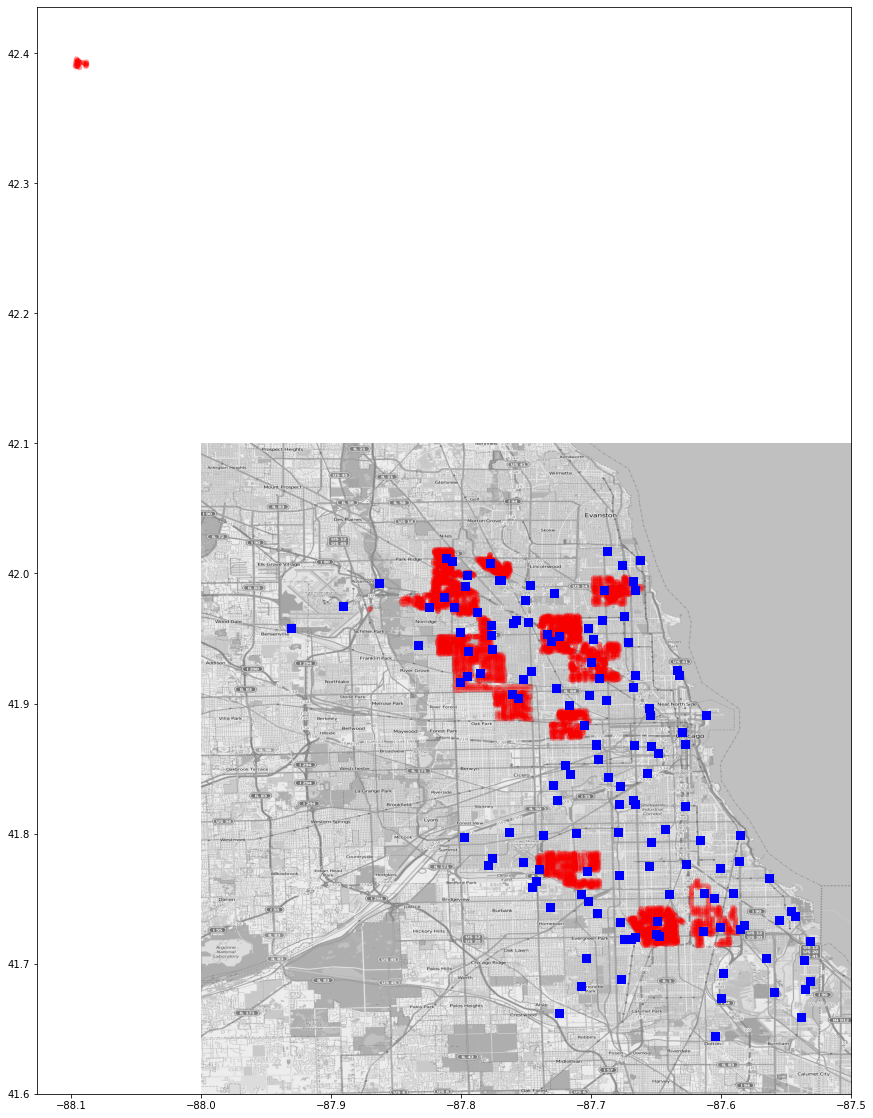

In [15]:
plt.figure(figsize=(15,20))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=20, alpha = 0.1)
plt.scatter(x=train_longs, y=train_lats, c='b', s=60, marker='s')

#plt.show()
plt.savefig('map.png')

#### Train Data Cleaning

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [17]:
train[train['nummosquitos'] == 50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 293 to 10267
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    1019 non-null   object 
 1   address                 1019 non-null   object 
 2   species                 1019 non-null   object 
 3   block                   1019 non-null   int64  
 4   street                  1019 non-null   object 
 5   trap                    1019 non-null   object 
 6   addressnumberandstreet  1019 non-null   object 
 7   latitude                1019 non-null   float64
 8   longitude               1019 non-null   float64
 9   addressaccuracy         1019 non-null   int64  
 10  nummosquitos            1019 non-null   int64  
 11  wnvpresent              1019 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 103.5+ KB


In [18]:
train['date'] = pd.to_datetime(train['date'])

In [19]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [20]:
train['month'].unique()

array([ 5,  6,  7,  8,  9, 10], dtype=int64)

In [21]:
train['addressaccuracy'].unique()

array([9, 8, 5, 3], dtype=int64)

In [22]:
train[train['addressaccuracy'] == 3]

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,day,month,year
69,2007-06-05,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,5,6,2007
127,2007-06-26,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,26,6,2007
179,2007-06-29,"Chicago, IL, USA",CULEX RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,29,6,2007
237,2007-07-02,"Chicago, IL, USA",CULEX SALINARIUS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,2,7,2007
342,2007-07-11,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,3,0,11,7,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,2013-09-06,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,10,0,6,9,2013
10050,2013-09-06,"Chicago, IL, USA",CULEX PIPIENS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,27,0,6,9,2013
10191,2013-09-12,"Chicago, IL, USA",CULEX PIPIENS/RESTUANS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,1,0,12,9,2013
10326,2013-09-19,"Chicago, IL, USA",CULEX PIPIENS,43,N ASHLAND AVE OVERPASS,T145,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",41.878114,-87.629798,3,9,0,19,9,2013


In [23]:
train.duplicated().sum()

813

In [24]:
train_clean = train.drop_duplicates(subset = ['date', 'species', 'latitude', 'longitude', 'address', 'trap', 'wnvpresent'], keep = 'first')
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8610 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    8610 non-null   datetime64[ns]
 1   address                 8610 non-null   object        
 2   species                 8610 non-null   object        
 3   block                   8610 non-null   int64         
 4   street                  8610 non-null   object        
 5   trap                    8610 non-null   object        
 6   addressnumberandstreet  8610 non-null   object        
 7   latitude                8610 non-null   float64       
 8   longitude               8610 non-null   float64       
 9   addressaccuracy         8610 non-null   int64         
 10  nummosquitos            8610 non-null   int64         
 11  wnvpresent              8610 non-null   int64         
 12  day                     8610 non-null   int64  

In [25]:
train_clean = train.loc[train['nummosquitos'] != 50, :]
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9487 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9487 non-null   datetime64[ns]
 1   address                 9487 non-null   object        
 2   species                 9487 non-null   object        
 3   block                   9487 non-null   int64         
 4   street                  9487 non-null   object        
 5   trap                    9487 non-null   object        
 6   addressnumberandstreet  9487 non-null   object        
 7   latitude                9487 non-null   float64       
 8   longitude               9487 non-null   float64       
 9   addressaccuracy         9487 non-null   int64         
 10  nummosquitos            9487 non-null   int64         
 11  wnvpresent              9487 non-null   int64         
 12  day                     9487 non-null   int64  

Mosquito count capped at 50, additional mosquitos caught above that are made into a new record.

These records and duplicate records have been deleted.

In [26]:
train_clean.reset_index(drop = True, inplace = True)

In [27]:
train_clean.drop(columns = ['nummosquitos', 'address', 'block', 'street', 'addressnumberandstreet'], inplace = True)

C:\Users\Ming\anaconda3\envs\dsi24\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Spray Cleaning

In [28]:
spray['date'] = pd.to_datetime(spray['date'])
spray['day'] = spray['date'].dt.day
spray['month'] = spray['date'].dt.month
spray['year'] = spray['date'].dt.year

In [29]:
spray['month'].unique()

array([8, 9, 7], dtype=int64)

In [30]:
pd.to_timedelta(spray['day'], unit='d')

0       29 days
1       29 days
2       29 days
3       29 days
4       29 days
          ...  
14830    5 days
14831    5 days
14832    5 days
14833    5 days
14834    5 days
Name: day, Length: 14835, dtype: timedelta64[ns]

In [31]:
spray['day']

0        29
1        29
2        29
3        29
4        29
         ..
14830     5
14831     5
14832     5
14833     5
14834     5
Name: day, Length: 14835, dtype: int64

In [32]:
# move to feature engineering?
spray['date_-1'] = spray['date'] - pd.to_timedelta(1, unit='d')
spray['date_-2'] = spray['date_-1'] - pd.to_timedelta(1, unit='d')
spray['date_-3'] = spray['date_-2'] - pd.to_timedelta(1, unit='d')
spray['date_-4'] = spray['date_-3'] - pd.to_timedelta(1, unit='d')
spray['date_-5'] = spray['date_-4'] - pd.to_timedelta(1, unit='d')
spray['date_-6'] = spray['date_-5'] - pd.to_timedelta(1, unit='d')
spray['date_-7'] = spray['date_-6'] - pd.to_timedelta(1, unit='d')
spray['date_-8'] = spray['date_-7'] - pd.to_timedelta(1, unit='d')
spray['date_-9'] = spray['date_-8'] - pd.to_timedelta(1, unit='d')
spray['date_-10'] = spray['date_-9'] - pd.to_timedelta(1, unit='d')

Mosquito lifecycles typically take 8-10 days for them to mature. We will check the spray period prior to see if there is a higher correlation with spray times prior to the period when mosquitoes were found.

In [33]:
spray_clean = spray[spray['longitude'] > -88]

In [34]:
spray_clean = spray_clean.drop(columns = 'time')

In [35]:
spray_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14740 entries, 95 to 14834
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14740 non-null  datetime64[ns]
 1   latitude   14740 non-null  float64       
 2   longitude  14740 non-null  float64       
 3   day        14740 non-null  int64         
 4   month      14740 non-null  int64         
 5   year       14740 non-null  int64         
 6   date_-1    14740 non-null  datetime64[ns]
 7   date_-2    14740 non-null  datetime64[ns]
 8   date_-3    14740 non-null  datetime64[ns]
 9   date_-4    14740 non-null  datetime64[ns]
 10  date_-5    14740 non-null  datetime64[ns]
 11  date_-6    14740 non-null  datetime64[ns]
 12  date_-7    14740 non-null  datetime64[ns]
 13  date_-8    14740 non-null  datetime64[ns]
 14  date_-9    14740 non-null  datetime64[ns]
 15  date_-10   14740 non-null  datetime64[ns]
dtypes: datetime64[ns](11), float64(2), int6

In [36]:
spray.duplicated().sum()

541

In [37]:
spray_cleaned = spray.drop_duplicates(keep = 'first')

#### Weather Cleaning

In [38]:
weather['date'] = pd.to_datetime(weather['date'])
weather['day'] = weather['date'].dt.day
weather['month'] = weather['date'].dt.month
weather['year'] = weather['date'].dt.year

In [39]:
weather['month'].unique()

array([ 5,  6,  7,  8,  9, 10], dtype=int64)

In [40]:
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [41]:
weather = weather.drop(columns = 'water1')

In [44]:
weather.loc[weather['heat'].str.contains('M'), 
            ['station', 'heat', 'cool']]

,station,heat,cool
7,2,M,M
505,2,M,M
675,2,M,M
1637,2,M,M
2067,2,M,M
2211,2,M,M
2501,2,M,M
2511,2,M,M
2525,2,M,M
2579,2,M,M


In [49]:
weather.loc[:, ['station', 'heat', 'cool', 'tavg', 'tmax', 'tmin']].iloc[660:680]

,station,heat,cool,tavg,tmax,tmin
660,1,0,5,70,82,57
661,2,0,7,72,82,62
662,1,0,5,70,77,63
663,2,0,7,72,78,66
664,1,0,4,69,79,59
665,2,0,4,69,78,60
666,1,0,2,67,81,53
667,2,0,3,68,80,55
668,1,2,0,63,68,57
669,2,0,0,65,69,60


In [44]:
col_to_clean.append(['resultspeed', 'resultdir'])

In [45]:
for col in col_to_clean:
    weather[col] = weather[col].astype('float64')

In [128]:
weather[['station', 'heat', 'cool']]

,station,heat,cool
0,1,0.0,2.0
1,2,0.0,3.0
2,1,14.0,0.0
3,2,13.0,0.0
4,1,9.0,0.0
...,...,...,...
2939,2,20.0,0.0
2940,1,23.0,0.0
2941,2,20.0,0.0
2942,1,25.0,0.0


In [47]:
weather.duplicated().sum()

0

In [51]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2933 non-null   float64       
 5   depart       1472 non-null   float64       
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2940 non-null   float64       
 8   heat         2933 non-null   float64       
 9   cool         2933 non-null   float64       
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        1472 non-null   float64       
 14  snowfall     1460 non-null   float64       
 15  preciptotal  2624 non-null   float64       
 16  stnpre

In [81]:
weather['codesum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
we_types = cvec.fit_transform(weather['codesum'])

In [93]:
we_types = pd.DataFrame(
    we_types.todense(),
    columns = cvec.get_feature_names()
            )

In [103]:
for row in range(len(we_types)):
    if we_types['tsra'][row] == 1:
        we_types['ts'][row] = 1
        we_types['ra'][row] = 1

we_types.drop(columns = 'tsra', inplace = True)

In [116]:
we_types.sum().sort_values(ascending = False)

ra      1035
br       813
ts       345
hz       263
dz       133
fg        43
vcts      19
fu         9
sn         6
bcfg       5
vcfg       4
mifg       3
sq         3
gr         1
dtype: int64

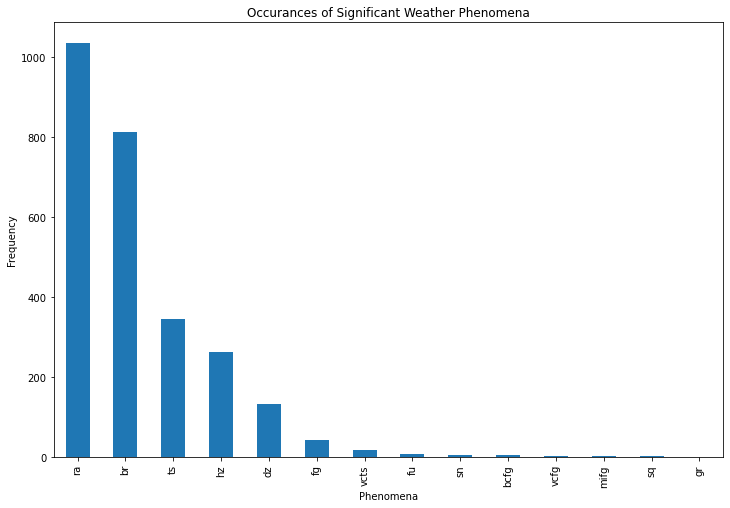

In [121]:
plt.figure(figsize = (12,8))
plt.title('Occurances of Significant Weather Phenomena')
plt.xlabel('Phenomena')
plt.ylabel('Frequency')
we_types.sum().sort_values(ascending = False).plot.bar();

In [122]:
we_types

,bcfg,br,dz,fg,fu,gr,hz,mifg,ra,sn,sq,ts,vcfg,vcts
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2940,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2941,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2942,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [79]:
weather['tavg'] = (weather['tmax'] + weather['tmin']) / 2

In [81]:
for row in weather.index:
    avg_temp = weather['tavg'][row] - 65
    if avg_temp >= 0:
        weather['cool'][row] = avg_temp
        weather['heat'][row] = 0
    if avg_temp < 0:
        weather['heat'][row] = abs(avg_temp)
        weather['cool'][row] = 0        

<ipython-input-81-2eeee7d08e47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['cool'][row] = avg_temp
<ipython-input-81-2eeee7d08e47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = 0
<ipython-input-81-2eeee7d08e47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['heat'][row] = abs(avg_temp)
<ipython-input-81-2eeee7d08e47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [82]:
weather

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,66.5,14,51,56,0,1.5,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,M,51,57,0,3.0,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,50.5,-3,42,47,14.5,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,51.5,M,42,47,13.5,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2,40,48,9.0,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,44.5,M,34,42,20.5,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,41.5,-4,34,40,23.5,0,0622,1649,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45.0,M,35,42,20.0,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40.0,-6,25,33,25.0,0,0623,1647,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


#### Test Cleaning

In [49]:
test['date'] = pd.to_datetime(test['date'])
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

In [50]:
test['month'].unique()

array([ 6,  7,  8,  9, 10], dtype=int64)

# Data Cleaning

# Exploratory Data Analysis

# Modelling

# Conclusion